In [1]:
import numpy as np
import librosa
import random
import matplotlib.pyplot as plt
import math
import fractional_fourier_transform

In [2]:
N = 4096
signal = np.array([math.log10(i + 1) - (i*0.1)*math.cos(i*0.01) + math.cos(i * 0.2) for i in range(N)])

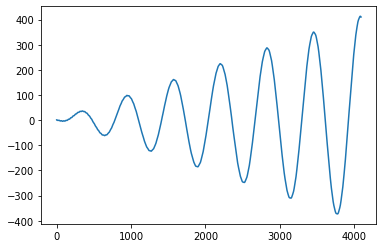

In [3]:
plt.plot(
    list(range(N)),
    signal
)
plt.show()

In [9]:
# standard library testing
stdFft = np.fft.fft(signal[:1024])
stdRfft = np.fft.rfft(signal[:1024])
librosa.set_fftlib(np.fft)
stdStft = librosa.stft(signal, n_fft=512)

In [5]:
transformer = fractional_fourier_transform.FractionalFourierTransform(1)
fracFft = transformer.fft(signal[:1024])
fracRft = transformer.rfft(signal[:1024])
librosa.set_fftlib(transformer)

(1024, 1024)
(1024,)
(1024, 1024)
(1024,)


In [6]:
print(np.allclose(stdFft, fracFft))
print(np.allclose(stdRfft, fracRft))

True
True


In [7]:
fracStft = librosa.stft(signal, )

(512, 512)
(33, 512)


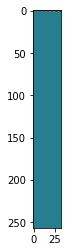

In [8]:
plt.imshow(fracStft.real)

In [10]:
fracStft

array([[-2.9620325e+02+0.0000000e+00j,  1.2549236e+03+0.0000000e+00j,
         4.9509780e+03+0.0000000e+00j, ...,
        -4.6076180e+04+0.0000000e+00j,  2.8744998e+04+0.0000000e+00j,
         7.3327883e+04+0.0000000e+00j],
       [ 3.8115396e+02+9.9475983e-14j,  8.9815163e+01+1.4809720e+03j,
        -3.1349224e+03+2.1717844e+03j, ...,
         3.7824043e+04+2.9255340e+04j, -2.0868176e+04+4.4242777e+04j,
        -5.4887211e+04-4.4727908e+02j],
       [ 9.3123398e+01+4.2632564e-14j, -8.5736169e+02-3.1292865e+02j,
         5.4508643e+02-1.2424778e+03j, ...,
        -1.3872938e+04-1.1329499e+04j,  6.3372124e+03-1.7258777e+04j,
         1.6400869e+04+1.5654085e+02j],
       ...,
       [-1.4613768e-01-1.9724413e-13j,  7.3069230e-02-1.1995128e-05j,
         4.3345799e-06+2.2106060e-06j, ...,
        -1.4036536e-05-3.5030575e-05j, -1.2930690e-01+3.1018688e-03j,
         2.5550470e-01-6.2715192e-03j],
       [ 1.4612418e-01+4.0578652e-13j, -2.3934394e-06-7.3063262e-02j,
         4.3327504e-06

In [12]:
np.allclose(stdStft, fracStft)

True

In [13]:
librosa.istft(fracStft)

array([  1.       ,   1.1811016,   1.1982223, ..., 411.068    ,
       410.59238  , 410.0919   ], dtype=float32)

In [16]:
originalRecov = librosa.istft(fracStft)

In [18]:
np.max(signal - originalRecov)

7.43701344845249e-05